## Random Forest Model

### Data and Library Importations

In [6]:
#Sources: (for Random Forest implementation)
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
#https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

df = pd.read_csv("NFL_data_super_cleaned.csv")
#drop any rows with null values
df.dropna(inplace=True)
display(df)
print(df.isnull().values.any(), df.isnull().sum().sum())

,posteam,yardline_100,quarter_seconds_remaining,qtr,down,goal_to_go,ydstogo,play_type,score_margin
0,PIT,58.0,893.0,1,1.0,0.0,10,pass,0.0
1,PIT,53.0,856.0,1,2.0,0.0,5,run,0.0
2,PIT,56.0,815.0,1,3.0,0.0,8,pass,0.0
3,PIT,56.0,807.0,1,4.0,0.0,8,kick,0.0
4,TEN,98.0,796.0,1,1.0,0.0,10,run,0.0
...,...,...,...,...,...,...,...,...,...
353055,CAR,71.0,82.0,4,2.0,0.0,1,pass,-5.0
353056,CAR,71.0,77.0,4,3.0,0.0,1,pass,-5.0
353057,CAR,66.0,63.0,4,2.0,0.0,10,pass,-5.0
353058,CAR,66.0,58.0,4,3.0,0.0,10,pass,-5.0


False 0


### Data Preprocessing

In [22]:
#Random forest is very memory intensive, so take a sample
sample = df.sample(n=15000, random_state=21, axis=0)

#one-hot encode categorical variables
cat_y = ["play_type_kick", "play_type_pass", "play_type_run"]
#posteam, play_type
sample = pd.get_dummies(sample)
labels = np.array(sample[cat_y])

sample = sample.drop(cat_y[0], axis = 1)
sample = sample.drop(cat_y[1], axis=1)
sample = sample.drop(cat_y[2], axis=1)

feature_list = list(sample.columns)
features = np.array(sample)
display(sample)

#split data into train and test sets, 80/20, seed = 21
X_train, X_test, y_train, y_test = train_test_split(sample, labels, test_size = 0.2, random_state = 21)

,yardline_100,quarter_seconds_remaining,qtr,down,goal_to_go,ydstogo,score_margin,posteam_ARI,posteam_ATL,posteam_BAL,...,posteam_NO,posteam_NYG,posteam_NYJ,posteam_PHI,posteam_PIT,posteam_SEA,posteam_SF,posteam_TB,posteam_TEN,posteam_WAS
222356,61.0,119.0,1,3.0,0.0,22,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
61840,78.0,702.0,1,4.0,0.0,4,-7.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2684,61.0,585.0,4,2.0,0.0,4,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
225580,73.0,483.0,3,3.0,0.0,3,-3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46520,70.0,201.0,1,1.0,0.0,10,7.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256852,32.0,534.0,4,1.0,0.0,10,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
298621,20.0,610.0,2,1.0,0.0,10,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34047,15.0,701.0,1,2.0,0.0,11,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
371,42.0,546.0,3,1.0,0.0,10,11.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### Model Training and Evaluation

Accuracy score: 0.5726666666666667
Mean Absolute Error: 0.0 degrees.


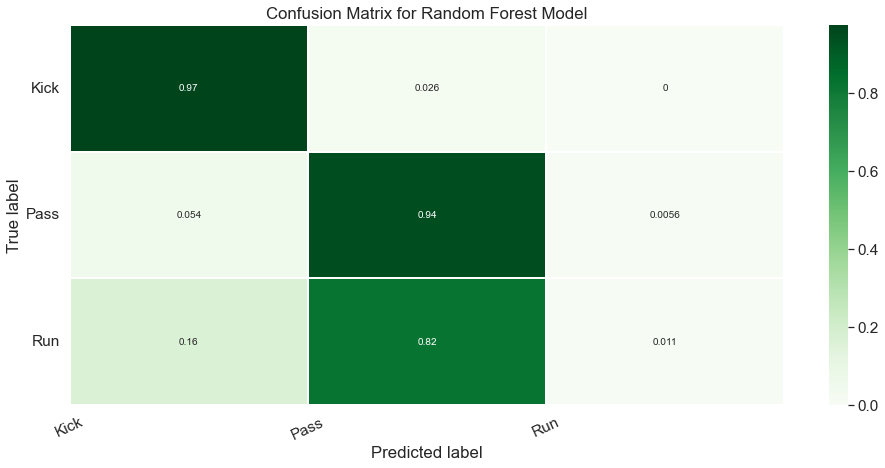

In [23]:
#n_jobs -1, will use most of your cpu, set to number of processors you would otherwise want
rf = RandomForestClassifier(random_state=21, n_jobs=-1, max_depth=5, n_estimators=200, oob_score=True)
rf.fit(X_train, y_train)
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
print("Accuracy score:", accuracy_score(y_test, predictions))
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

#Make confusion matrix
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sb.set(font_scale=1.4)
sb.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Kick', 'Pass', 'Run']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.savefig("forest-con-matrix.png")
plt.show()